In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/All the Intermediate Colleges in Pakistan (1).csv'
df = pd.read_csv(file_path)

In [ ]:
# Preview the dataset
df.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
# Drop rows with missing values (or you can fill them with ffill/backfill/mean)
df_cleaned = df.dropna()
# Confirm missing values handled
df_cleaned.isnull().sum()


,0
Name,0
Location,0
Study Program,0
Sector,0
Affiliation,0
Rating,0


In [ ]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (1630, 6)


In [ ]:
# Columns in dataset
print("Columns:", df.columns)

Columns: Index(['Name', 'Location', 'Study Program', 'Sector', 'Affiliation', 'Rating'], dtype='object')


In [ ]:
# Info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


In [ ]:
# Summary statistics
df.describe(include='all')

,Name,Location,Study Program,Sector,Affiliation,Rating
count,1630,1626,1630,1101,155,1630
unique,1630,1573,774,2,97,21
top,Campus.pk Lahore,Chakwal,FA ICS Computer Science FSc Pre Medical FSc Pr...,Private,University of Sargodha,0*
freq,1,11,49,562,7,1119


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Name,0
Location,4
Study Program,0
Sector,529
Affiliation,1475
Rating,0


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df['rating'] = df['rating'].str.replace('*', '', regex=False)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


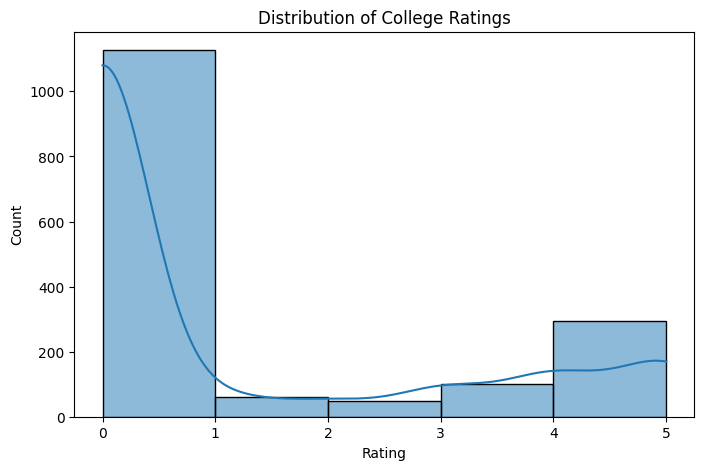

In [ ]:
#  Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title("Distribution of College Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

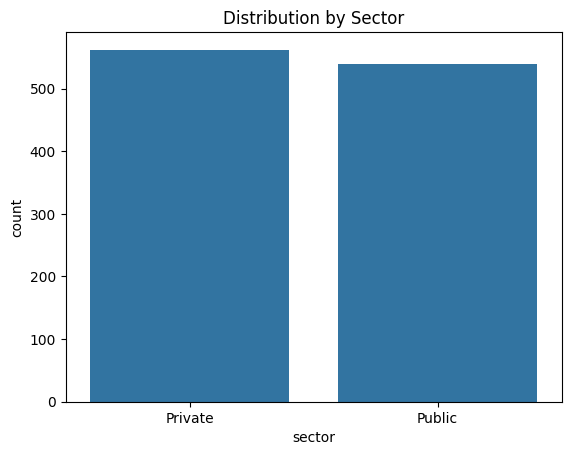

In [ ]:
# Sector Distribution
sns.countplot(data=df, x='sector')
plt.title("Distribution by Sector")
plt.show()

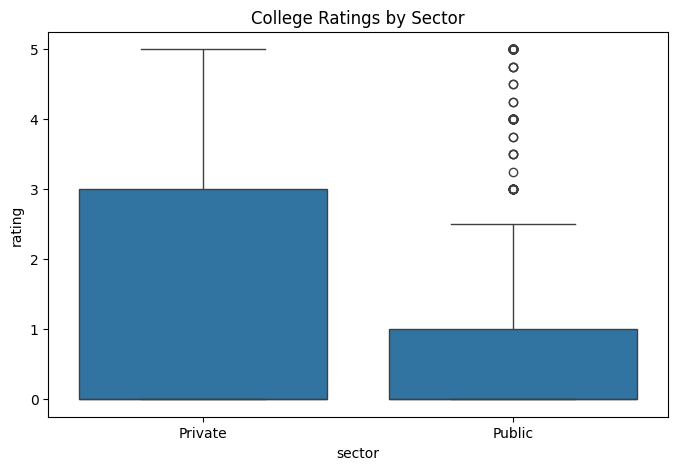

In [ ]:
# Step 9: Sector vs Rating
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='sector', y='rating')
plt.title("College Ratings by Sector")
plt.show()

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
 #Remove any NaN values from the 'City' column
df.dropna(subset=['location'], inplace=True)

# Check for duplicates and remove them
df.drop_duplicates(subset=['location'], inplace=True)

# Find the top 10 cities with the most colleges (using value_counts)
top_cities = df['location'].value_counts().head(10)

In [ ]:
# Ensure proper city extraction first
import numpy as np
def extract_city(location):
    if pd.isna(location):
        return np.nan
    # Common city patterns - make sure this list is comprehensive
    cities = ['Lahore', 'Islamabad', 'Faisalabad', 'Rawalpindi', 'Karachi',
              'Gujranwala', 'Sargodha', 'Peshawar', 'Bahawalpur', 'Multan']  # Add more as needed

    for city in cities:
        if city.lower() in location.lower():
            return city
    return np.nan

# Apply city extraction
df['City'] = df['location'].apply(extract_city)

# Now drop NA in City (not Location)
df = df.dropna(subset=['City'])

Number of cities found: 10


<ipython-input-24-2b2198260ddd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


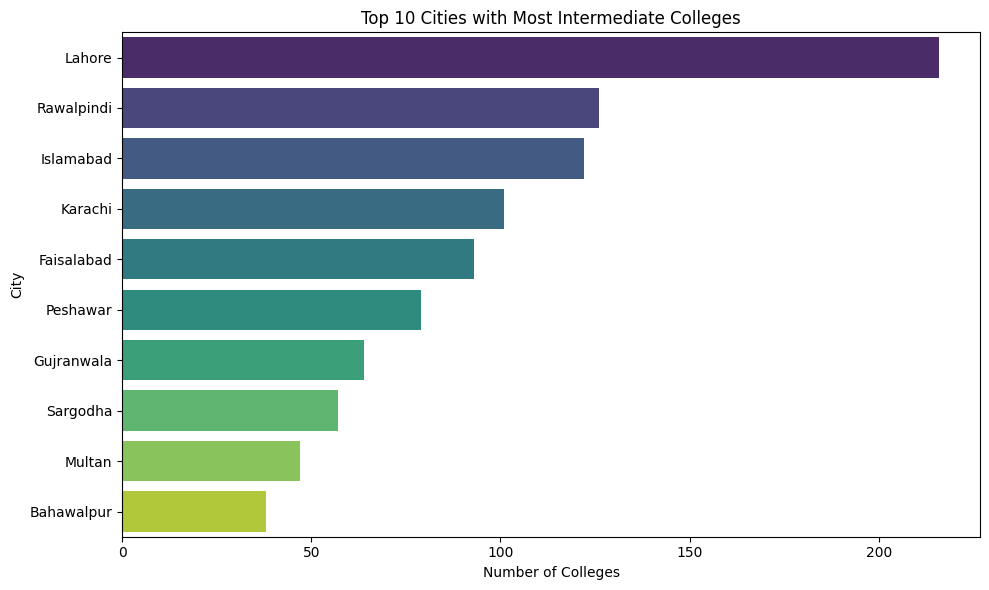

In [ ]:
# Get top cities - verify length
top_cities = df['City'].value_counts().head(10)
print(f"Number of cities found: {len(top_cities)}")  # Should show 10
# Plot only if we have 10 cities
if len(top_cities) == 10:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
    plt.title('Top 10 Cities with Most Intermediate Colleges')
    plt.xlabel('Number of Colleges')
    plt.ylabel('City')
    plt.tight_layout()
    plt.show()
else:
    print(f"Warning: Only found {len(top_cities)} cities in the data")

<ipython-input-25-b3a9f302311e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_city_ratings.values, y=top_city_ratings.index, palette='magma')


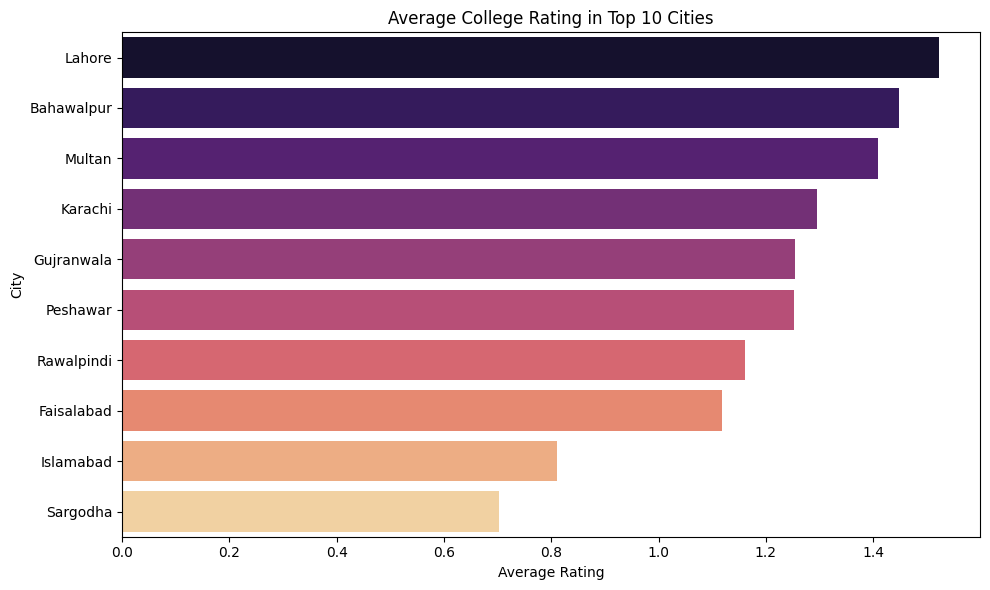

In [ ]:
top_cities_list = top_cities.index.tolist()
top_city_ratings = df[df['City'].isin(top_cities_list)].groupby('City')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_city_ratings.values, y=top_city_ratings.index, palette='magma')
plt.title('Average College Rating in Top 10 Cities')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.tight_layout()
plt.show()